# 村上が選んだかわいい人の50枚とランダムに評価されたかわいい人の類似性

村上が最初に選んだ可愛いと評価した人の特徴量（可愛いが前提で選択）と益井がランダムに選んだものを可愛いと評価したもとの類似性の差

In [1]:
# pandasモジュールの読み込み
import pandas as pd
# グラフ描画ライブラリmatplotlibの読み込み
import matplotlib.pyplot as plt
# 数値計算用ライブラリnumpyの読み込み
import numpy as np
# 村上3次元の特徴量データを読み込み
# 引数にindex_col=0を入れなとUnnamed:0が追加されてしまう
# index_colで指定した列をスタートで考えてくれる
df = pd.read_csv('../CSV_DATA/arange_feature_all.csv',index_col=0)
# 欠損値をすべて0に置換
df = df.fillna(0)
# インデックスを振り直す
df = df.reset_index()

In [2]:
df.tail()

,index,name,Face_shape,Hair_len,Eyelid,Eye_shape,Nose_shape,Nose_len,Nose_bridge,Eyebrows,...,Mouse,Tears_bag,Dis_eye_brows,Forehead,Barb,Gills,Dis_nose_mouse,Value_of_murakami,Value_of_yoshi,Cloth_color
202,202,103,4.0,1.0,1.0,4.0,0.0,0.0,2.0,3.0,...,1.0,2.0,2.0,1.0,2.0,2.0,2.0,0,0.0,茶
203,203,104,4.0,1.0,3.0,4.0,0.0,0.0,2.0,3.0,...,1.0,2.0,2.0,2.0,3.0,2.0,1.0,0,0.0,黄色
204,204,105,5.0,2.0,3.0,5.0,0.0,0.0,2.0,3.0,...,1.0,1.0,3.0,1.0,1.0,1.0,1.0,0,1.0,柄
205,205,106,4.0,2.0,1.0,4.0,1.0,0.0,2.0,3.0,...,3.0,2.0,2.0,3.0,2.0,1.0,2.0,1,0.0,黒
206,206,107,1.0,1.0,2.0,3.0,1.0,0.0,2.0,1.0,...,1.0,1.0,2.0,1.0,2.0,2.0,1.0,0,1.0,柄


In [3]:
murakami_value_data = df[:49]
yoshi_value_data = df[50:98]
rand_value_data = df[100:206]

def arange_vec(vec):
    return vec.drop(['Value_of_yoshi','Cloth_color','Value_of_murakami','name','index'],axis=1)

murakami_value_data = np.array(arange_vec(murakami_value_data))
yoshi_value_data = np.array(arange_vec(yoshi_value_data))

In [4]:
rand_murakami_value_data = rand_value_data[rand_value_data['Value_of_murakami']==1]
rand_murakami_value_data = np.array(arange_vec(rand_murakami_value_data))
rand_yoshi_value_data = rand_value_data[rand_value_data['Value_of_yoshi']==1]
rand_yoshi_value_data = np.array(arange_vec(rand_yoshi_value_data))

## 村上が集めたかわいいと評価した画像データ群とランダムデータ群のベクトルの類似度を計算

### コサイン類似度計算を用いてみる

In [5]:
data_slim = np.array([])
rand_data_slim = np.array([])
all_data_slim = np.array([])
def cos_slim(v1,v2):
    return np.dot(v1,v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

for i in range(0,len(murakami_value_data)-1):
    for j in range(i+1,len(murakami_value_data)):
        sample_X = murakami_value_data[i]
        sample_Y = murakami_value_data[j]
        data_slim = np.append(data_slim,cos_slim(sample_X,sample_Y))
        
for i in range(len(rand_murakami_value_data)-1):
     for j in range(i+1,len(rand_murakami_value_data)):
        sample_X = rand_murakami_value_data[i]
        sample_Y = rand_murakami_value_data[j]
        rand_data_slim = np.append(rand_data_slim,cos_slim(sample_X,sample_Y))
        
for i in range(0,len(murakami_value_data)):
    for j in range(0,len(rand_murakami_value_data)):
        sample_X = murakami_value_data[i]
        sample_Y = rand_murakami_value_data[j]
        all_data_slim = np.append(all_data_slim,cos_slim(sample_X,sample_Y))

### 主成分分析
どこの特徴量がかわいい評価に影響を与えているか調べる

寄与率の大きい変数の抽出

データの対象はランダムに集めたものを評価したデータ

In [6]:
murakami_value_data = df[:49]
yoshi_value_data = df[50:98]
rand_value_data = df[100:206]

In [7]:
rand_value_data.iloc[:,18]
print(rand_value_data.head())

     index name  Face_shape  Hair_len  Eyelid  Eye_shape  Nose_shape  \
100    100    1         2.0       1.0     2.0        3.0         0.0   
101    101    2         2.0       1.0     0.0        0.0         0.0   
102    102    3         1.0       2.0     3.0        3.0         0.0   
103    103    4         0.0       1.0     0.0        0.0         1.0   
104    104    5         4.0       1.0     0.0        3.0         1.0   

     Nose_len  Nose_bridge  Eyebrows  ...  Mouse  Tears_bag  Dis_eye_brows  \
100       0.0          2.0       3.0  ...    3.0        2.0            0.0   
101       1.0          3.0       3.0  ...    1.0        2.0            3.0   
102       0.0          2.0       1.0  ...    1.0        2.0            2.0   
103       0.0          2.0       0.0  ...    2.0        2.0            2.0   
104       0.0          3.0       1.0  ...    3.0        2.0            3.0   

     Forehead  Barb  Gills  Dis_nose_mouse  Value_of_murakami  Value_of_yoshi  \
100       2.0   1

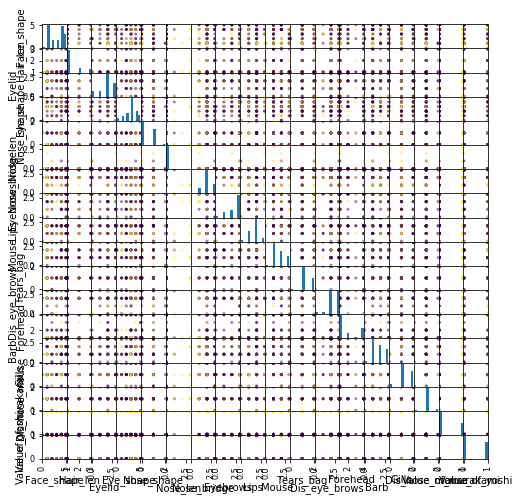

In [8]:
from pandas import plotting
plotting.scatter_matrix(rand_value_data.iloc[:,1:],figsize=(8,8),c=list(rand_value_data.iloc[:,18]),alpha=0.5)
plt.show()

In [9]:
rand_value_data = rand_value_data.drop(['index','name','Value_of_yoshi','Cloth_color'],axis=1)

In [10]:
rand_value_data.head()

,Face_shape,Hair_len,Eyelid,Eye_shape,Nose_shape,Nose_len,Nose_bridge,Eyebrows,Lips,Mouse,Tears_bag,Dis_eye_brows,Forehead,Barb,Gills,Dis_nose_mouse,Value_of_murakami
100,2.0,1.0,2.0,3.0,0.0,0.0,2.0,3.0,2.0,3.0,2.0,0.0,2.0,1.0,1.0,1.0,0
101,2.0,1.0,0.0,0.0,0.0,1.0,3.0,3.0,0.0,1.0,2.0,3.0,1.0,1.0,1.0,1.0,1
102,1.0,2.0,3.0,3.0,0.0,0.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,3.0,2.0,1.0,0
103,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,2.0,2.0,2.0,4.0,1.0,1.0,1.0,0
104,4.0,1.0,0.0,3.0,1.0,0.0,3.0,1.0,2.0,3.0,2.0,3.0,1.0,3.0,1.0,1.0,1


In [11]:
dfs = rand_value_data.iloc[:,:16].apply(lambda x:(x-x.mean())/x.std(),axis=0)
dfs.head()

,Face_shape,Hair_len,Eyelid,Eye_shape,Nose_shape,Nose_len,Nose_bridge,Eyebrows,Lips,Mouse,Tears_bag,Dis_eye_brows,Forehead,Barb,Gills,Dis_nose_mouse
100,-0.565025,-0.551980,0.050734,0.059773,-0.811359,-0.217701,-0.160566,0.692412,0.408633,1.620846,1.365027,-2.990402,0.014575,-0.903531,-0.554816,-0.097129
101,-0.565025,-0.551980,-2.100400,-2.316208,-0.811359,1.880143,1.386710,0.692412,-2.578612,-0.851236,1.365027,0.891018,-0.757901,-0.903531,-0.554816,-0.097129
102,-1.202180,0.948273,1.126301,0.059773,-0.811359,-0.217701,-0.160566,-1.531699,0.408633,-0.851236,1.365027,-0.402789,-0.757901,1.461266,1.174905,-0.097129
103,-1.839336,-0.551980,-2.100400,-2.316208,1.058294,-0.217701,-0.160566,-2.643754,-2.578612,0.384805,1.365027,-0.402789,1.559527,-0.903531,-0.554816,-0.097129
104,0.709286,-0.551980,-2.100400,0.059773,1.058294,-0.217701,1.386710,-1.531699,0.408633,1.620846,1.365027,0.891018,-0.757901,1.461266,-0.554816,-0.097129


In [12]:
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

pca = PCA()
feature = pca.fit(dfs)
feature = pca.transform(dfs)

In [13]:
# 主成分得点
pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,1.277420,1.262866,-1.791197,1.002107,-0.168140,-0.068121,-0.598532,0.312247,-1.191881,-0.526493,1.860666,-0.527029,0.615985,1.409881,-0.889205,-0.226645
1,2.575373,2.519778,0.773186,-0.855397,-1.174602,-0.376752,0.739781,-1.753342,0.185811,-0.950173,-2.214469,0.494291,-0.881960,-0.639550,-1.168203,0.802233
2,-0.370423,0.086017,-0.385709,-0.655204,1.338940,-1.679378,-0.734656,0.374487,1.075749,0.946129,0.345027,0.289952,-1.548324,1.636041,0.330495,0.506410
3,4.864156,1.018996,0.679297,-0.528119,-0.200057,0.141734,-1.062422,0.717119,1.286913,0.253263,-1.731971,-0.339848,0.768845,0.580801,1.062850,-0.009504
4,2.004018,-0.760725,-1.134574,-0.540648,-0.314569,-1.042709,2.796201,0.081172,1.303012,0.803477,0.261945,0.216308,0.167752,-0.741714,0.572158,-0.766438


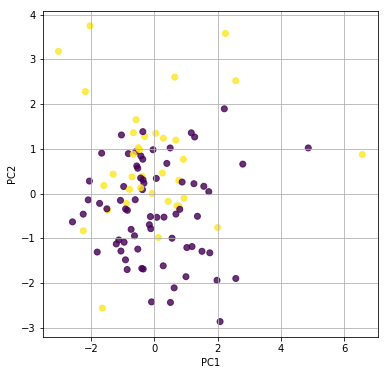

In [14]:
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(rand_value_data.iloc[:, 16]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [16]:
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,0.132020
PC2,0.100901
PC3,0.090637
PC4,0.087728
PC5,0.071444
PC6,0.070298
PC7,0.063393
PC8,0.060259
PC9,0.053588
PC10,0.051864


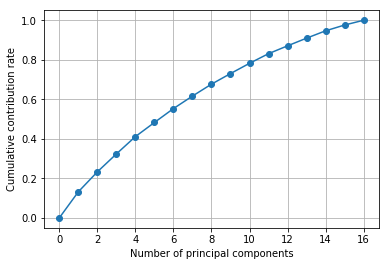

In [17]:
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [18]:
# PCA の固有値
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,2.112316
PC2,1.614417
PC3,1.450190
PC4,1.403641
PC5,1.143112
PC6,1.124775
PC7,1.014284
PC8,0.964148
PC9,0.857405
PC10,0.829821


In [19]:
# PCA の固有ベクトル
pd.DataFrame(pca.components_, columns=rand_value_data.columns[:16], index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,Face_shape,Hair_len,Eyelid,Eye_shape,Nose_shape,Nose_len,Nose_bridge,Eyebrows,Lips,Mouse,Tears_bag,Dis_eye_brows,Forehead,Barb,Gills,Dis_nose_mouse
PC1,-0.136398,0.034687,-0.440589,-0.367646,0.237266,-0.117781,0.316523,-0.289767,-0.300741,0.151492,0.297692,-0.300430,0.160250,-0.141787,-0.200260,-0.135753
PC2,-0.397886,-0.100462,-0.149078,-0.032034,-0.204152,0.412325,-0.452381,0.229788,-0.313337,0.088180,0.182053,-0.084277,-0.393758,-0.093696,-0.147283,-0.086508
PC3,0.069229,0.190081,0.161164,0.040721,0.164192,0.332345,-0.046661,-0.253011,-0.199859,-0.548895,-0.229925,0.138481,0.140628,-0.131635,-0.501215,-0.162012
PC4,-0.116320,-0.519063,0.110251,-0.133352,-0.056331,-0.109363,0.032484,0.073969,0.280372,0.008048,-0.313594,-0.227982,0.020310,-0.015734,-0.141090,-0.644894
PC5,-0.359890,0.174366,0.225646,-0.109616,0.302459,-0.092445,0.073338,-0.038079,-0.123259,-0.058834,-0.342366,-0.369880,-0.286046,0.528002,0.017851,0.191521
PC6,-0.266520,-0.163537,-0.080177,0.325915,0.540695,-0.242329,-0.001536,0.383471,-0.127064,-0.117782,-0.136450,0.046561,0.061424,-0.463616,0.078366,0.125653
PC7,0.067699,-0.239546,0.004468,0.181437,0.306179,0.233333,0.412119,0.093053,0.119240,0.279299,0.182556,0.376747,-0.305758,0.260664,-0.386473,0.010890
PC8,-0.433609,0.246392,0.012034,-0.024412,0.238112,0.236296,-0.274189,-0.075379,0.495073,0.282295,0.067546,0.093383,0.459390,0.063930,-0.060344,-0.017317
PC9,-0.158557,-0.413825,-0.398503,0.316171,0.035118,0.083319,-0.090849,-0.334949,-0.030158,-0.369343,0.106551,0.087885,0.138256,0.395526,0.290280,-0.001424
PC10,-0.326473,0.221194,-0.119106,0.266952,-0.215050,-0.349499,0.041666,-0.484463,0.128619,0.118194,-0.178631,0.256696,-0.392451,-0.232418,-0.082219,-0.105320


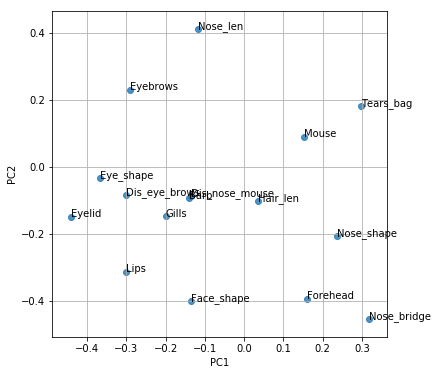

In [20]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], rand_value_data.columns[:16]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

ランダムデータを用いた場合の第一主成分と第二主成分の寄与率計算して、各変数をプロットしたもの

Tears_bag（涙袋の有無）とMouse（口の形）とNose_len（鼻の長さ）がかわいいさに大きく影響していることがわかる

## 同様の主成分分析を村上の画像データのみで適応してみる

In [21]:
murakami_value_data.head()

,index,name,Face_shape,Hair_len,Eyelid,Eye_shape,Nose_shape,Nose_len,Nose_bridge,Eyebrows,...,Mouse,Tears_bag,Dis_eye_brows,Forehead,Barb,Gills,Dis_nose_mouse,Value_of_murakami,Value_of_yoshi,Cloth_color
0,0,sample1,1.0,1.0,2.0,3.0,0.0,0.0,1.0,1.0,...,2.0,1.0,3.0,1.0,3.0,1.0,1.0,1,0.0,柄
1,1,sample2,1.0,1.0,2.0,3.0,0.0,0.0,1.0,2.0,...,3.0,1.0,3.0,1.0,2.0,1.0,1.0,1,0.0,柄
2,2,sample3,4.0,1.0,2.0,3.0,0.0,0.0,1.0,3.0,...,1.0,2.0,3.0,2.0,2.0,2.0,1.0,1,1.0,白
3,3,アドリアナ・リマ,1.0,1.0,2.0,3.0,0.0,0.0,1.0,1.0,...,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1,0.0,黒
4,4,アンジェラ・ベイビー,3.0,1.0,2.0,3.0,0.0,0.0,1.0,3.0,...,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1,1.0,黒


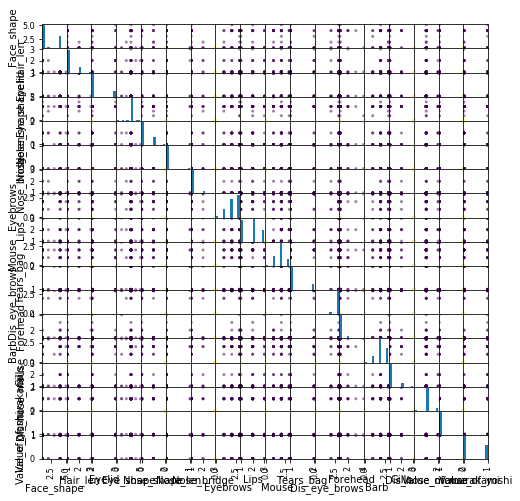

In [22]:
from pandas import plotting
plotting.scatter_matrix(murakami_value_data.iloc[:,1:],figsize=(8,8),c=list(murakami_value_data.iloc[:,18]),alpha=0.5)
plt.show()

In [23]:
murakami_value_data = murakami_value_data.drop(['index','name','Value_of_yoshi','Cloth_color'],axis=1)

In [24]:
murakami_value_data.head()

,Face_shape,Hair_len,Eyelid,Eye_shape,Nose_shape,Nose_len,Nose_bridge,Eyebrows,Lips,Mouse,Tears_bag,Dis_eye_brows,Forehead,Barb,Gills,Dis_nose_mouse,Value_of_murakami
0,1.0,1.0,2.0,3.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,1
1,1.0,1.0,2.0,3.0,0.0,0.0,1.0,2.0,2.0,3.0,1.0,3.0,1.0,2.0,1.0,1.0,1
2,4.0,1.0,2.0,3.0,0.0,0.0,1.0,3.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,1.0,1
3,1.0,1.0,2.0,3.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1
4,3.0,1.0,2.0,3.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,1


In [25]:
dfs_murakami = murakami_value_data.iloc[:,:16].apply(lambda x:(x-x.mean())/x.std(),axis=0)
dfs_murakami.head()

,Face_shape,Hair_len,Eyelid,Eye_shape,Nose_shape,Nose_len,Nose_bridge,Eyebrows,Lips,Mouse,Tears_bag,Dis_eye_brows,Forehead,Barb,Gills,Dis_nose_mouse
0,-0.783994,-0.479281,-0.501176,0.149074,-0.602091,-0.204168,-0.314738,-1.547551,0.243340,0.175882,-0.501176,0.317481,-0.324830,1.164628,-0.383626,-0.237443
1,-0.783994,-0.479281,-0.501176,0.149074,-0.602091,-0.204168,-0.314738,-0.304436,0.243340,1.612252,-0.501176,0.317481,-0.324830,-0.194105,-0.383626,-0.237443
2,1.273989,-0.479281,-0.501176,0.149074,-0.602091,-0.204168,-0.314738,0.938679,-1.081509,-1.260488,1.954586,0.317481,1.443689,-0.194105,1.966082,-0.237443
3,-0.783994,-0.479281,-0.501176,0.149074,-0.602091,-0.204168,-0.314738,-1.547551,-1.081509,-1.260488,-0.501176,0.317481,-0.324830,-1.552837,-0.383626,-0.237443
4,0.587995,-0.479281,-0.501176,0.149074,-0.602091,-0.204168,-0.314738,0.938679,-1.081509,0.175882,1.954586,0.317481,-0.324830,-1.552837,-0.383626,-0.237443


In [26]:
feature_murakami = pca.fit(dfs_murakami)
feature_murakami = pca.transform(dfs_murakami)
# 主成分得点
pd.DataFrame(feature_murakami, columns=["PC{}".format(x + 1) for x in range(len(dfs_murakami.columns))]).head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-0.331535,-0.822776,0.271304,0.558982,0.517090,-1.677817,-0.489426,0.998847,-0.164170,0.529727,0.133781,0.219700,-0.210802,-0.069504,-0.358253,-0.281962
1,-0.667371,-0.392174,-0.911276,0.740928,0.040876,-0.650053,-1.030399,0.506800,-0.498698,0.235360,-0.826626,-0.371604,-0.297295,-0.060822,0.293152,-0.214640
2,0.362061,0.057239,-0.442195,-2.813795,-1.017312,1.197618,0.371838,0.226657,-0.514485,-0.851973,1.811074,0.416726,-0.484858,-0.708350,-0.286476,0.254340
3,0.793547,-0.531835,0.829094,-0.419223,-1.120571,-0.832194,-1.117967,0.443231,-0.383406,1.471871,0.484948,-0.996999,0.360693,0.912596,0.061059,0.408994
4,-0.368255,0.514360,-0.843654,-1.327193,-2.232608,0.549009,-1.007820,-0.616349,-0.342075,-0.169476,-0.087430,0.488627,0.147637,0.201453,-0.020675,0.256002


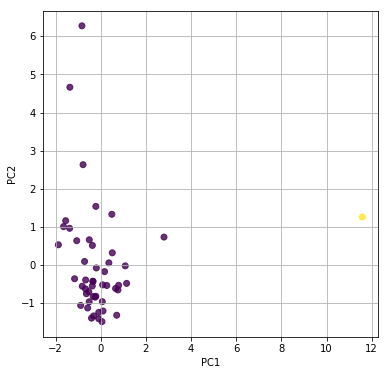

In [27]:
plt.figure(figsize=(6, 6))
plt.scatter(feature_murakami[:, 0], feature_murakami[:, 1], alpha=0.8, c=list(murakami_value_data.iloc[:, 16]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [28]:
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs_murakami.columns))])

,0
PC1,0.220197
PC2,0.133805
PC3,0.093611
PC4,0.092236
PC5,0.086981
PC6,0.078231
PC7,0.052326
PC8,0.046559
PC9,0.041563
PC10,0.037317


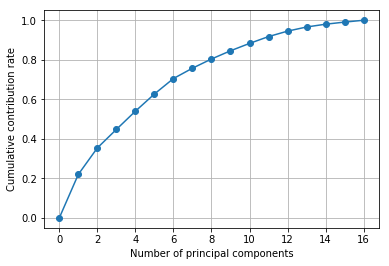

In [29]:
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [30]:
# PCA の固有値
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(dfs_murakami.columns))])

,0
PC1,3.523149
PC2,2.140878
PC3,1.497773
PC4,1.475769
PC5,1.391694
PC6,1.251700
PC7,0.837209
PC8,0.744944
PC9,0.665005
PC10,0.597072


In [31]:
# PCA の固有ベクトル
pd.DataFrame(pca.components_, columns=murakami_value_data.columns[:16], index=["PC{}".format(x + 1) for x in range(len(dfs_murakami.columns))])

,Face_shape,Hair_len,Eyelid,Eye_shape,Nose_shape,Nose_len,Nose_bridge,Eyebrows,Lips,Mouse,Tears_bag,Dis_eye_brows,Forehead,Barb,Gills,Dis_nose_mouse
PC1,-0.026741,-0.110179,-0.125403,-0.386510,0.324385,-0.064941,0.402920,-0.273258,-0.109662,-0.225589,-0.049558,-0.424320,-0.031546,-0.241316,0.344002,-0.229317
PC2,-0.322169,0.549104,0.076448,-0.031886,-0.059920,0.532661,0.130851,0.156945,0.054398,0.025061,0.432455,-0.193123,0.035936,-0.146831,-0.027308,-0.085209
PC3,0.035609,0.280469,0.521555,0.315744,-0.032240,-0.075971,0.029973,-0.199683,-0.204856,-0.500124,-0.206365,-0.029412,-0.163745,0.158963,-0.113944,-0.316492
PC4,-0.380916,0.165214,0.181947,0.086297,0.267949,-0.167971,0.236991,-0.162493,0.234080,0.333240,-0.187322,0.022080,-0.516833,0.069707,0.030930,0.360727
PC5,-0.189904,0.111391,0.100624,-0.311628,-0.054158,-0.001923,0.104791,0.082815,0.550681,-0.058071,-0.396608,0.010800,0.449295,0.364863,-0.011993,-0.156025
PC6,0.341421,0.012418,0.507290,-0.003290,-0.078335,-0.113244,0.040597,0.365126,0.290277,-0.019135,0.013224,0.028749,0.012152,-0.442586,0.411445,0.145095
PC7,0.453672,0.236758,0.043066,0.050921,0.268980,0.258060,0.092357,-0.112136,-0.196193,0.019799,-0.106659,-0.206298,0.279469,0.316482,0.073465,0.545116
PC8,0.097098,0.010467,-0.243349,0.250021,-0.599420,0.235497,0.003658,-0.345741,0.210223,0.035413,-0.156396,-0.157823,-0.186941,0.083252,0.444632,-0.005307
PC9,0.244286,-0.061587,-0.205082,-0.001325,0.432257,0.396673,-0.291846,0.118029,0.408508,-0.298084,-0.064792,0.078794,-0.409142,0.039074,-0.041565,-0.119915
PC10,-0.022293,0.083694,0.144535,-0.158472,0.017443,0.021458,-0.392428,-0.658220,0.212688,-0.040884,0.034388,0.060937,0.209289,-0.428782,-0.218521,0.176823


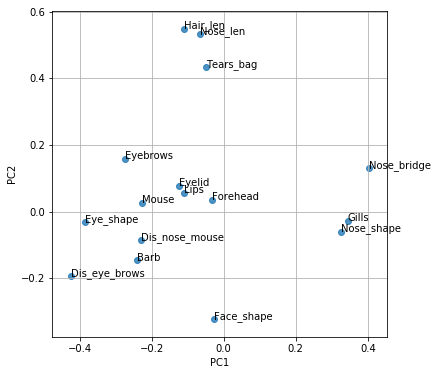

In [32]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], murakami_value_data.columns[:16]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Nose_bridge（鼻の高さ）、Tears_bag（涙袋の有無）、Nose_len（鼻の長さ）、Hair_len（髪の長さ）、Nose_shape（鼻の形）、Gills（エラの有無）

に大きく影響されている事がわかる